# Electrical Fault detection

We have to predict faults in a power system.

# Dataset Desciption

The dataset contains one file 

detect_dataset.csv

shape of the dataset is (12001, 9)

# Columns in dataset

there are seven columns

'Output (S)',

'Ia',

'Ib',

'Ic',

'Va', 

'Vb', 

'Vc', 

'Unnamed: 7',

'Unnamed: 8'

Outputs - 0 (No-fault) or 1(Fault is present)

In [98]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [116]:
# Read csv file using pandas
data =  pd.read_csv("/content/drive/MyDrive/ML work /electric fault/detect_dataset.csv")

In [117]:
data.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


# basic EDA

In [118]:
#check shape of the dataset
data.shape

(12001, 9)

In [119]:
# check columns of dataset
data.columns

Index(['Output (S)', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc', 'Unnamed: 7',
       'Unnamed: 8'],
      dtype='object')

In [120]:
# check length of dataset
print('dataset length: ',len(data))

dataset length:  12001


In [121]:
# Check which columns are having categorical, numerical or boolean values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [122]:
# For more information on the dataset like the total count in all the columns of train data
# min, max values and more information of the respective columns 
data.describe()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
count,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,0.0,0.0
mean,0.457962,6.709369,-26.557793,22.353043,0.010517,-0.015498,0.004980,NaN,NaN
std,0.498250,377.158470,357.458613,302.052809,0.346221,0.357644,0.349272,NaN,NaN
min,0.000000,-883.542316,-900.526952,-883.357762,-0.620748,-0.659921,-0.612709,NaN,NaN
25%,0.000000,-64.348986,-51.421937,-54.562257,-0.237610,-0.313721,-0.278951,NaN,NaN
50%,0.000000,-3.239788,4.711283,-0.399419,0.002465,-0.007192,0.008381,NaN,NaN
75%,1.000000,53.823453,69.637787,45.274542,0.285078,0.248681,0.289681,NaN,NaN
max,1.000000,885.738571,889.868884,901.274261,0.609864,0.627875,0.608243,NaN,NaN


In [123]:
# Check for missing values in all the columnns of the dataset
data.isnull().sum()

Output (S)        0
Ia                0
Ib                0
Ic                0
Va                0
Vb                0
Vc                0
Unnamed: 7    12001
Unnamed: 8    12001
dtype: int64

In [124]:
# loop through datatset to find count of unique values of each column
for x in data.columns:
    print(x,':',len(data[x].unique()))

Output (S) : 2
Ia : 12001
Ib : 12001
Ic : 12001
Va : 11996
Vb : 11813
Vc : 11987
Unnamed: 7 : 1
Unnamed: 8 : 1


In [125]:
# drop 'Unnamed: 7','Unnamed: 8'
data.drop(['Unnamed: 7','Unnamed: 8'],axis=1, inplace=True)
data.head(2)

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.05449,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.10200,-0.628612,0.526202


In [126]:
# check total number of fault and no-fault instances
data['Output (S)'].value_counts()

0    6505
1    5496
Name: Output (S), dtype: int64

# Correlation Matrix

## Why?
#### A correlation matrix is a table showing correlation coefficients between variables.

### There are three broad reasons for computing a correlation matrix:

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

In [127]:
# Using pandas
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
Output (S),1.00,0.04,-0.13,0.12,-0.04,0.01,0.02
Ia,0.04,1.00,-0.38,-0.28,0.03,-0.16,0.13
Ib,-0.13,-0.38,1.00,-0.53,-0.03,0.03,-0.01
Ic,0.12,-0.28,-0.53,1.00,-0.00,-0.10,0.10
Va,-0.04,0.03,-0.03,-0.00,1.00,-0.51,-0.47
Vb,0.01,-0.16,0.03,-0.10,-0.51,1.00,-0.52
Vc,0.02,0.13,-0.01,0.10,-0.47,-0.52,1.00


# Histogram

1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6647e68d0>,
      dtype=object)

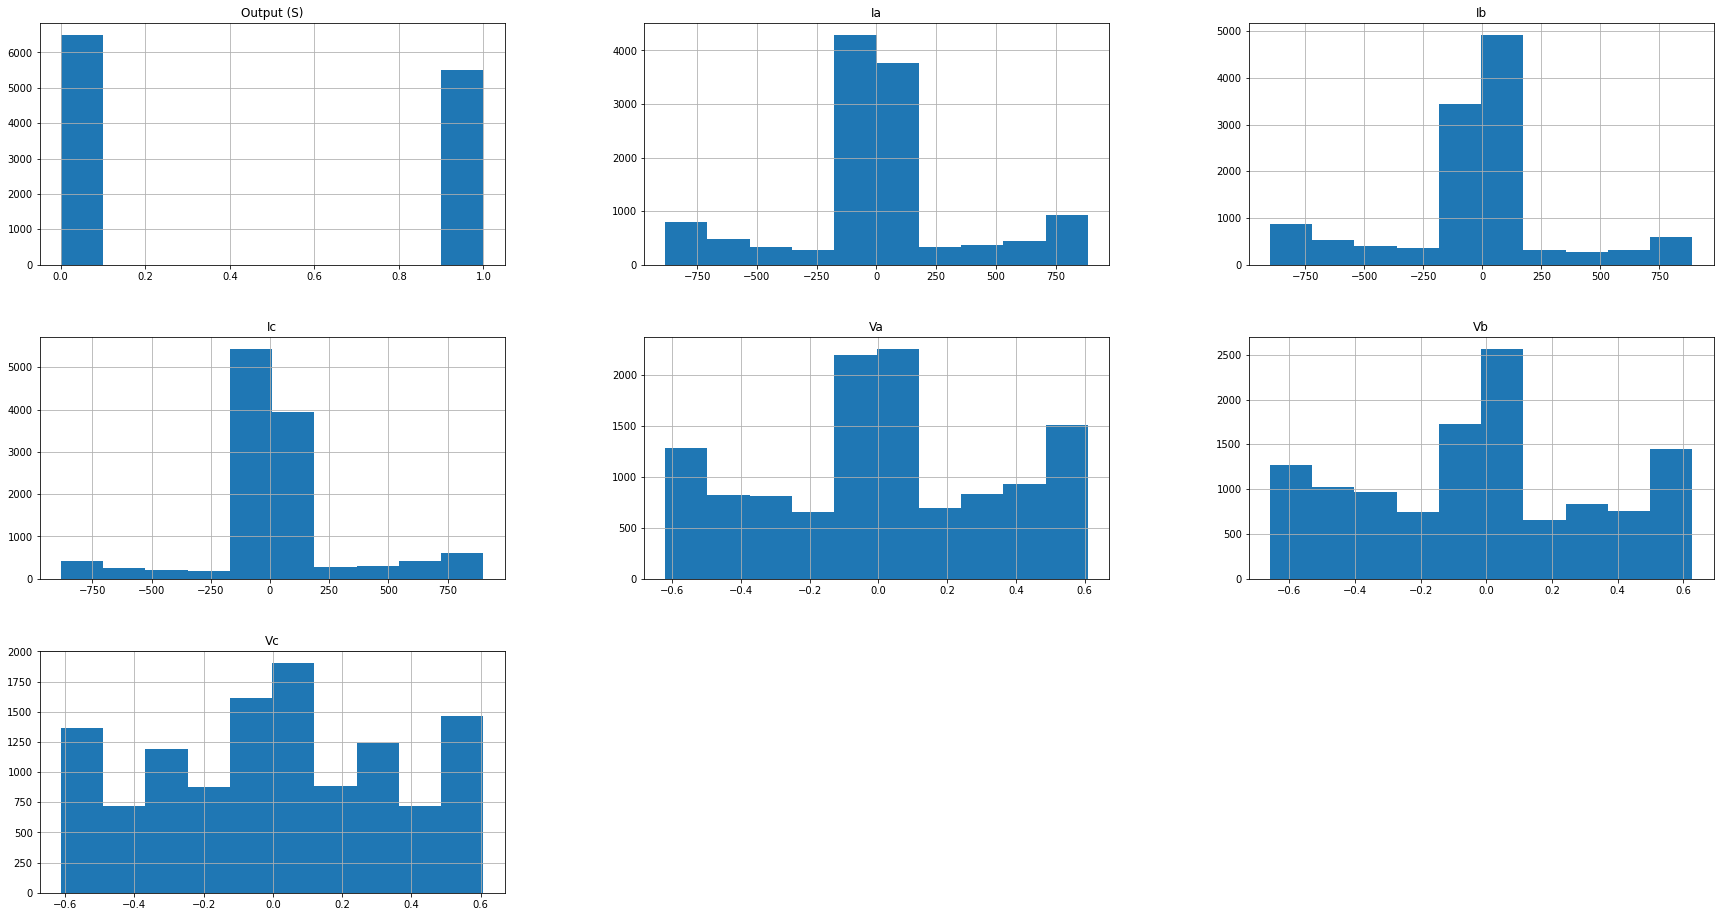

In [128]:
# Histogram using pandas 
data.hist(figsize=(30, 16))

### Count plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


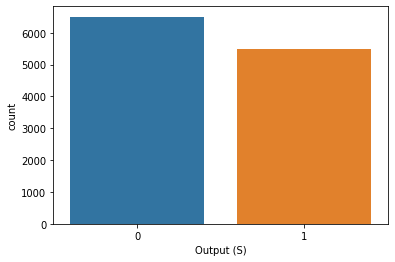

In [129]:
# count plot of Output (S) column
sns.countplot(data['Output (S)'])
plt.show()

# Box plot


A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset

{'boxes': [<matplotlib.lines.Line2D at 0x7fb664223ad0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb66422ab10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb664231b50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb664231610>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb66422a090>,
  <matplotlib.lines.Line2D at 0x7fb66422a5d0>]}

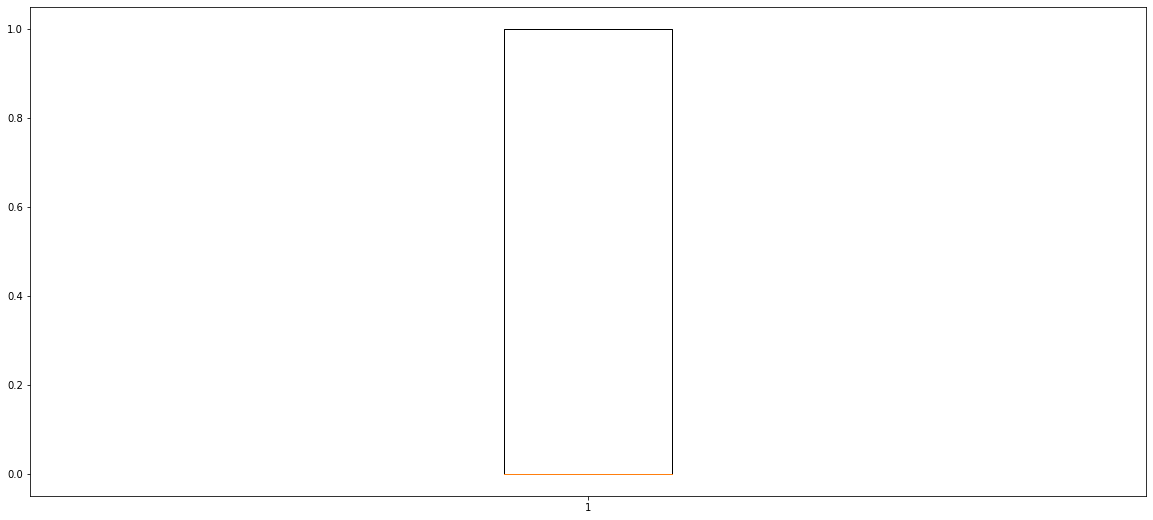

In [130]:
# box plot using pandas 
# box plot for Output (S) column 
plt.figure(figsize=(20, 9))
plt.boxplot(x=data['Output (S)'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fb66420dad0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb664210b10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb66419ab50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb66419a610>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb664210090>,
  <matplotlib.lines.Line2D at 0x7fb6642105d0>]}

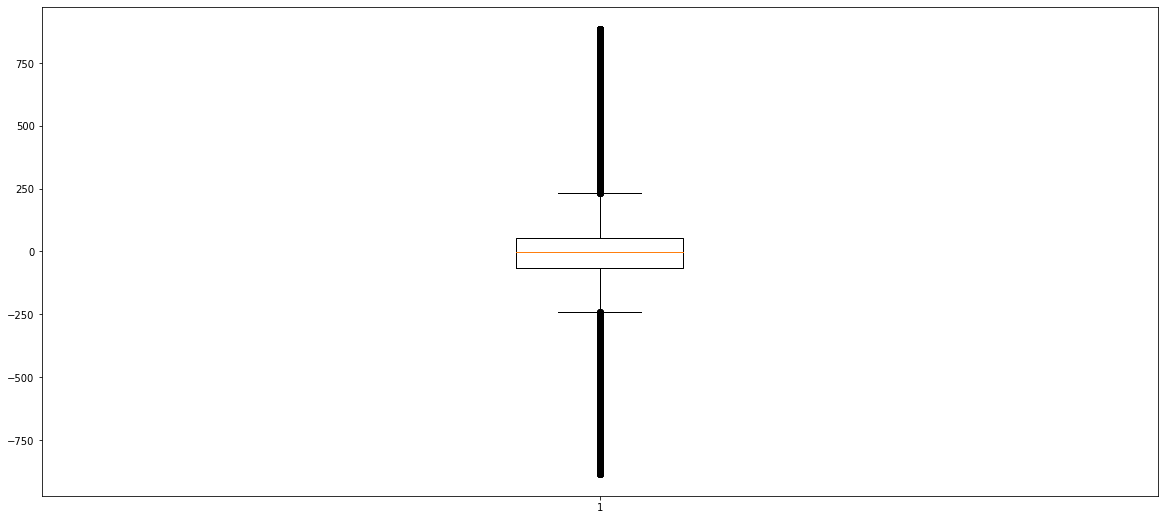

In [131]:
# box plot using pandas 
# box plot for Ia column 
plt.figure(figsize=(20, 9))
plt.boxplot(x=data['Ia'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fb664173e10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb66417de90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb664182ed0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb664182990>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb66417d410>,
  <matplotlib.lines.Line2D at 0x7fb66417d950>]}

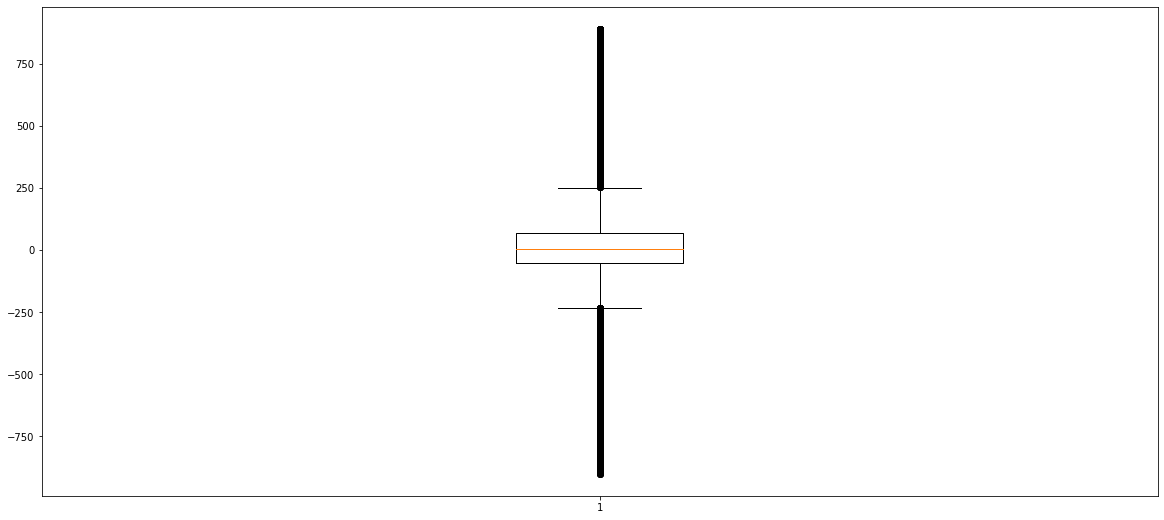

In [132]:
# box plot using pandas 
# box plot for Ib column 
plt.figure(figsize=(20, 9))
plt.boxplot(x=data['Ib'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fb6640e7210>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb6640ed250>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb6640f6290>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb6640edd10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb6640e7790>,
  <matplotlib.lines.Line2D at 0x7fb6640e7cd0>]}

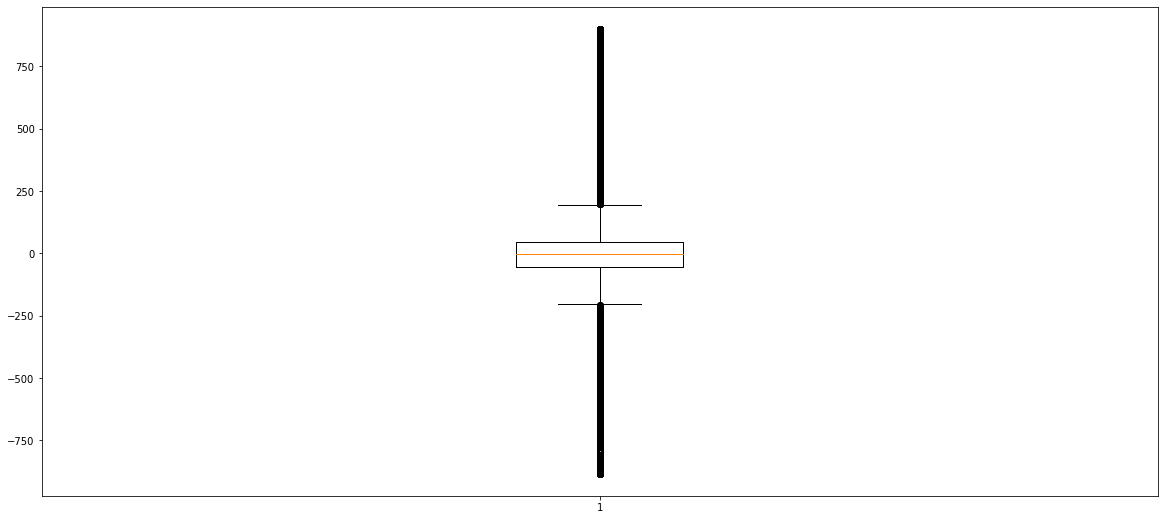

In [133]:
# box plot using pandas 
# box plot for Ic column 
plt.figure(figsize=(20, 9))
plt.boxplot(x=data['Ic'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fb6640d3510>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb66405b550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb664062590>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb664062050>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb6640d3a90>,
  <matplotlib.lines.Line2D at 0x7fb6640d3fd0>]}

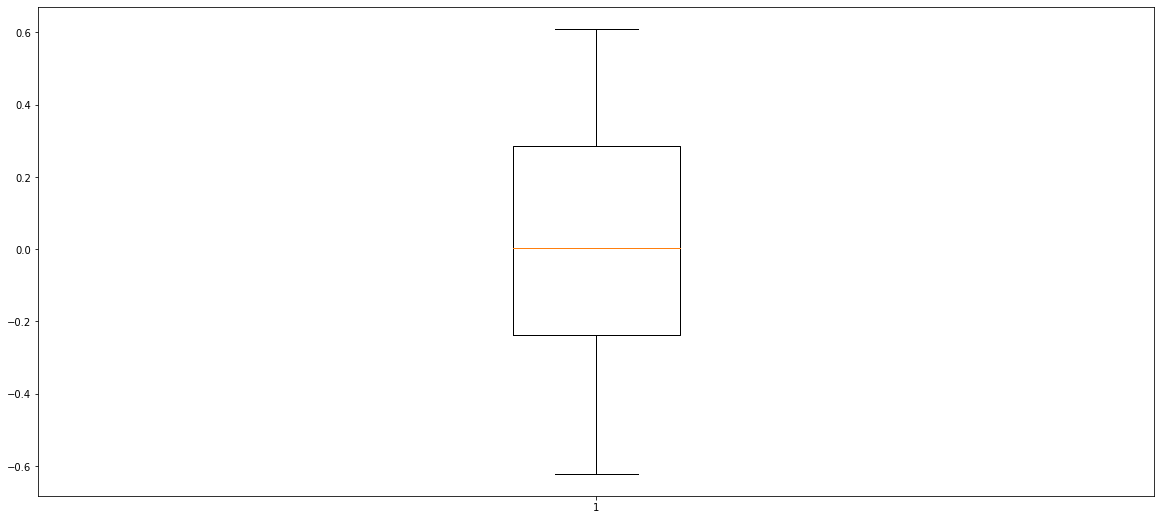

In [134]:
# box plot using pandas 
# box plot for Va column 
plt.figure(figsize=(20, 9))
plt.boxplot(x=data['Va'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fb664041810>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb664046850>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb66404d890>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb66404d350>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb664041d90>,
  <matplotlib.lines.Line2D at 0x7fb664046310>]}

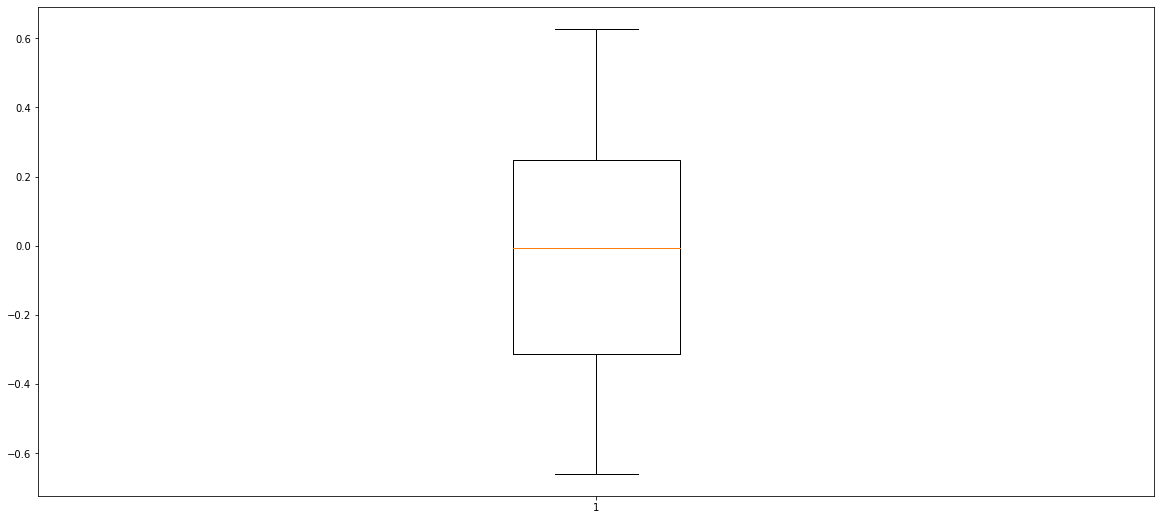

In [135]:
# box plot using pandas 
# box plot for Vb column 
plt.figure(figsize=(20, 9))
plt.boxplot(x=data['Vb'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fb663fa9c90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb663fb1cd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb663fb6d10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb663fb67d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb663fb1250>,
  <matplotlib.lines.Line2D at 0x7fb663fb1790>]}

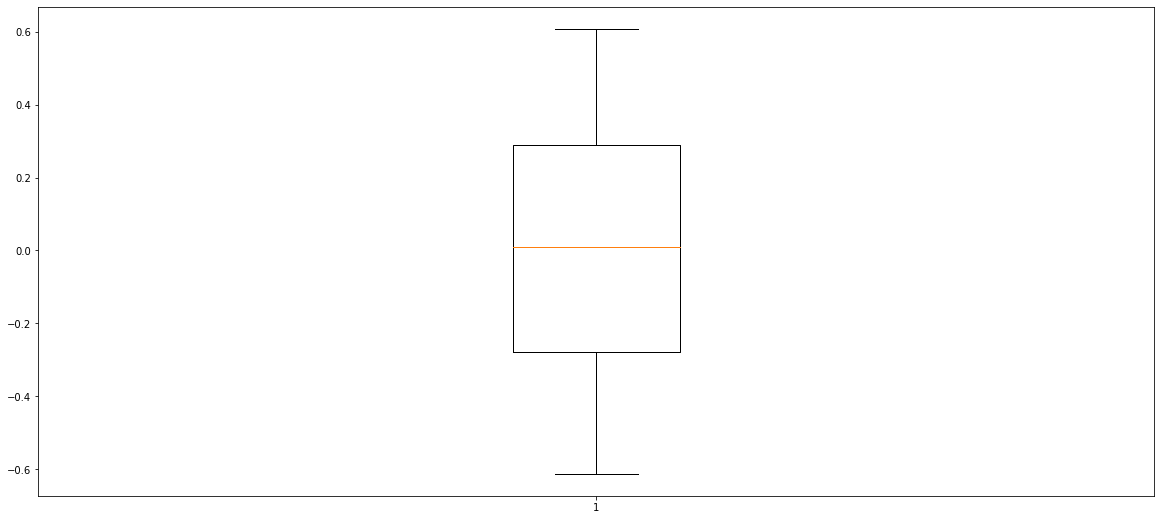

In [136]:
# box plot using pandas 
# box plot for Vc column 
plt.figure(figsize=(20, 9))
plt.boxplot(x=data['Vc'])

Dataset is balanced and not skewed in nature

# Dendrogram

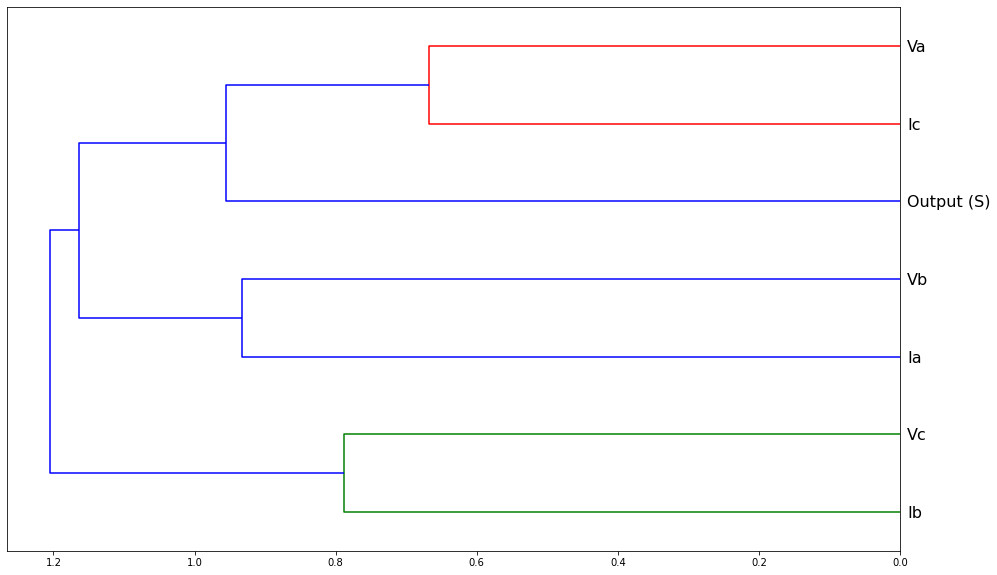

In [137]:
# Plot a Dendrogram on the columns of the dataset

# droping the NaN values
X = data.dropna()

import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=X.columns, orientation='left', leaf_font_size=16)
plt.show()

# Preprocessing, Modeling and prediction on test data

In [101]:
## Split the labels and the target

X = data.drop(['Output (S)'], axis=1)
y = data['Output (S)']
#check the shape 
print(X.shape, y.shape)

(12001, 6) (12001,)


In [102]:
# import train test split
from sklearn.model_selection import train_test_split

# Split into training (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

# check shape of X_train and y_train
print(X_train.shape, y_train.shape)

# check shape of X_test and y_test
print(X_test.shape, y_test.shape)

(9600, 6) (9600,)
(2401, 6) (2401,)


### Scaling

In [103]:
# import min max scalar
from sklearn.preprocessing import MinMaxScaler

# Instantiate t
scaled = MinMaxScaler()

# fit on train data
X_train = scaled.fit_transform(X_train)
# fit on test data
X_test = scaled.transform(X_test)

In [104]:
# Visualize importance of all the features in the dataset for the prediction

def visualize_importance(feature_importances, feat_train_df):
    
    # creating dataframe for feature name and feature importance
    feature_importance_df = pd.DataFrame()

    _df = pd.DataFrame()
    _df['feature_importance'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_importance_df = pd.concat([feature_importance_df, _df], 
                                      axis=0, ignore_index=True)

    # grouping all data and sorting in descending order
    order = feature_importance_df.groupby('column')\
        .sum()[['feature_importance']]\
        .sort_values('feature_importance', ascending=False).index[:50]
    
    # ploting feature importance data using boxenplot
    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
    sns.boxenplot(data=feature_importance_df, 
                  x='feature_importance', 
                  y='column', 
                  order=order, 
                  ax=ax, 
                  palette='viridis', 
                  orient='h')
    ax.tick_params(axis='x', rotation=0)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    return fig, ax

In [105]:
# import accuracy_score, precision_score, precision_score, confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,precision_score,confusion_matrix

## LogisticRegression

accuracy_score:  0.721366097459392
precision_score 0.39347234814143245
recall_score 1.0
[[1298  669]
 [   0  434]]
CPU times: user 262 ms, sys: 204 ms, total: 465 ms
Wall time: 254 ms


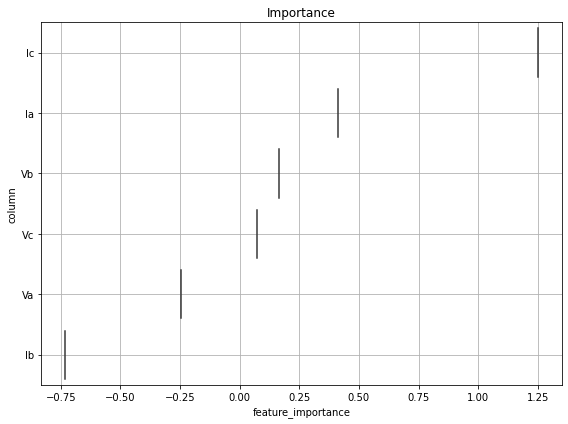

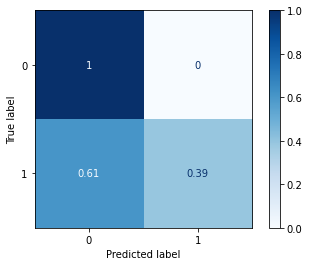

In [106]:
%%time
# Fit a logistic Regression model to the train dataset

# Import logisticRegressor
from sklearn.linear_model import LogisticRegression

# Instantiate the model
log_class = LogisticRegression()

# fitting the model on train data
log_class.fit(X_train, y_train)

#predict on test data
y_pred_log = log_class.predict(X_test)

# print accuracy_score,precision_score,precision_score,confusion_matrix
print("accuracy_score: ", accuracy_score(y_pred_log, y_test))
print("precision_score", precision_score(y_pred_log, y_test))
print("recall_score", recall_score(y_pred_log, y_test))
print(confusion_matrix(y_pred_log,y_test))

# visualizing importance of features
fig, ax = visualize_importance(log_class.coef_[0], X)

# display confusion matrix
disp = metrics.plot_confusion_matrix(log_class, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

## RandomForestClassifier

accuracy_score:  0.9975010412328197
precision_score 1.0
recall_score 0.9945897204688909
[[1292    0]
 [   6 1103]]
CPU times: user 2.67 s, sys: 107 ms, total: 2.78 s
Wall time: 2.67 s


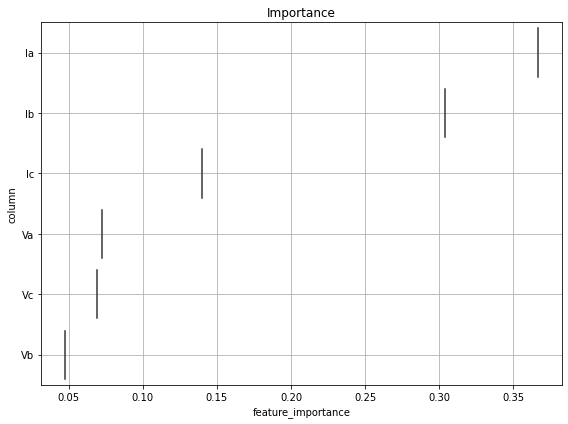

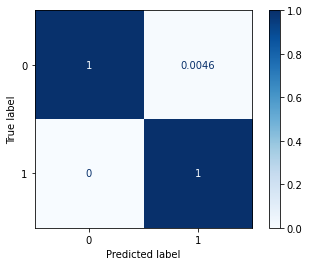

In [107]:
%%time
# Fit a RandomForestClassifier model to the train dataset

#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=40)

# fitting the model on train data
rf_clf.fit(X_train, y_train)

# predict on test data
y_preds_rf = rf_clf.predict(X_test)

# print accuracy_score,precision_score,precision_score,confusion_matrix
print("accuracy_score: ", accuracy_score(y_preds_rf, y_test))
print("precision_score", precision_score(y_preds_rf, y_test))
print("recall_score", recall_score(y_preds_rf, y_test))
print(confusion_matrix(y_preds_rf,y_test))

# visualizing importance of features
fig, ax = visualize_importance(rf_clf.feature_importances_, X)

# display confusion matrix
disp = metrics.plot_confusion_matrix(rf_clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

## DecisionTreeClassifier

accuracy_score:  0.9975010412328197
precision_score 1.0
recall_score 0.9945897204688909
[[1292    0]
 [   6 1103]]
CPU times: user 184 ms, sys: 52.4 ms, total: 236 ms
Wall time: 185 ms


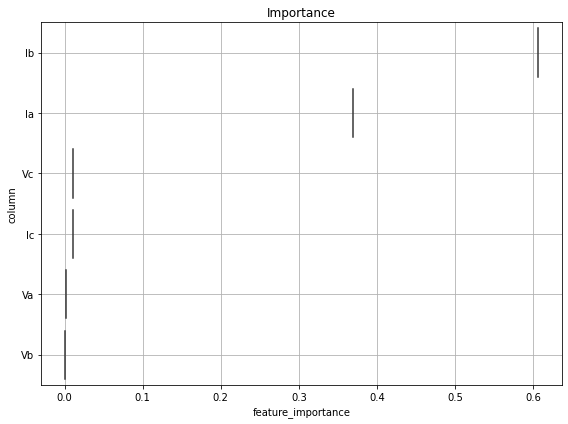

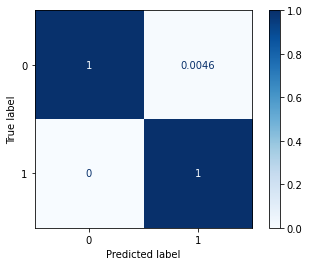

In [108]:
%%time
# Fit a DecisionTreeClassifier model to the train dataset

#import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
dt_clf = DecisionTreeClassifier()

# fitting the model on train data
dt_clf.fit(X_train,y_train)

# predict on test data
y_preds_dt = dt_clf.predict(X_test)

# print accuracy_score,precision_score,precision_score,confusion_matrix
print("accuracy_score: ", accuracy_score(y_preds_dt, y_test))
print("precision_score", precision_score(y_preds_dt, y_test))
print("recall_score", recall_score(y_preds_dt, y_test))
print(confusion_matrix(y_preds_dt,y_test))


# visualizing importance of features
fig, ax = visualize_importance(dt_clf.feature_importances_, X)


# display confusion matrix
disp = metrics.plot_confusion_matrix(dt_clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')


## GradientBoostingClassifier

accuracy_score:  0.9966680549770929
precision_score 0.9963735267452403
recall_score 0.9963735267452403
[[1294    4]
 [   4 1099]]
CPU times: user 2.45 s, sys: 69.7 ms, total: 2.52 s
Wall time: 2.47 s


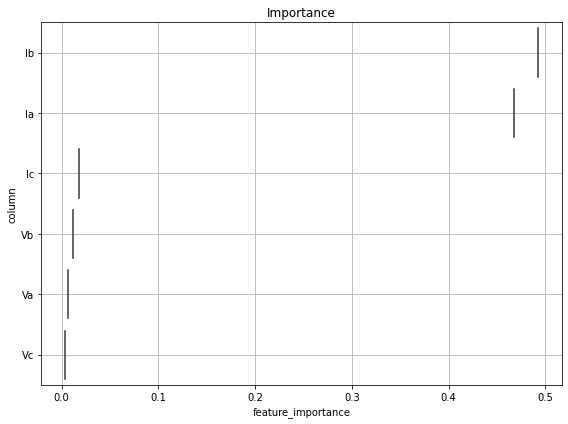

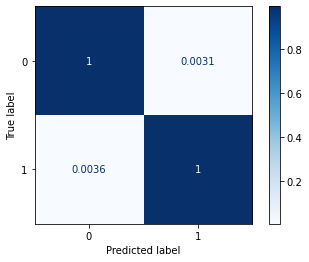

In [109]:
%%time
# Fit a Gradient Boosting Classifier model to the train dataset

# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the model
GBR_clf = GradientBoostingClassifier()

# fitting the model on train data
GBR_clf.fit(X_train,y_train)

# predict on test data
y_preds_GB = GBR_clf.predict(X_test)

# print accuracy_score,precision_score,precision_score,confusion_matrix
print("accuracy_score: ", accuracy_score(y_preds_GB, y_test))
print("precision_score", precision_score(y_preds_GB, y_test))
print("recall_score", recall_score(y_preds_GB, y_test))
print(confusion_matrix(y_preds_GB,y_test))


# visualizing importance of features
fig, ax = visualize_importance(GBR_clf.feature_importances_, X)

# display confusion matrix
disp = metrics.plot_confusion_matrix(GBR_clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

## Hyper parameter tunning

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model.

Every machine learning models will have different hyperparameters that can be set.

###RandomizedSearchCV

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.

1. The first step is to write the parameters that we want to consider
2. From these parameters select the best ones.(which are printed in output)

In [ ]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
  random = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
  # Fit the random search model
  random.fit(X_train, y_train)
  random.best_params_

In [ ]:
%%time
# for random forest classifier
# create parameters dict for tunning
rf_para_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

# passing data for hyper parameter tunning with Randomized search cv
random_Search(RandomForestClassifier(),X_train, y_train, param_grid=rf_para_grid)

### working with best model

In [110]:
# print Area under ROC of Model On Test Set
score = metrics.roc_auc_score(y_test, y_preds_rf)

print(f'Area under ROC of Model On Test Set - {score:,.2%}')

Area under ROC of Model On Test Set - 99.77%


In [111]:
# Create a dataframe with predicted result as data using best model
predictions = pd.DataFrame(y_preds_rf)

In [112]:
predictions.head()

,0
0,0
1,1
2,0
3,0
4,0


# Conclusion

According to this model, the predicted value we got, matches with the actual target values. The model is performing well.  We have performed EDA, preprocessing, build different models, visualized feature importance, did hyper parameter tunning and did prediction.